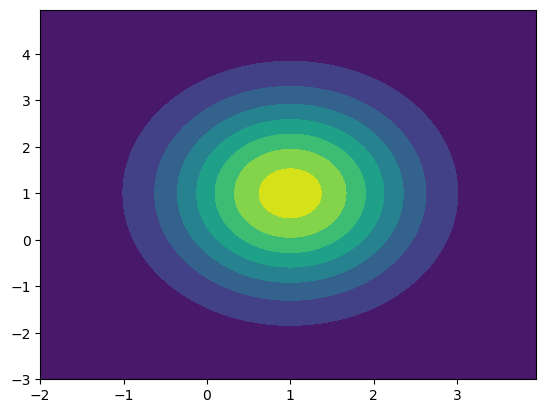

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


# 3.1
def plot_normal(mean, cov, scale):
    x, y = scale
    pos = np.dstack((x, y))
    rv = multivariate_normal(mean, cov)
    ax = plt.figure().add_subplot(111)
    ax.contourf(x, y, rv.pdf(pos))

plot_normal([1,1], [[1,0],[0,2]], np.mgrid[-2:4:.05, -3:5:.05])

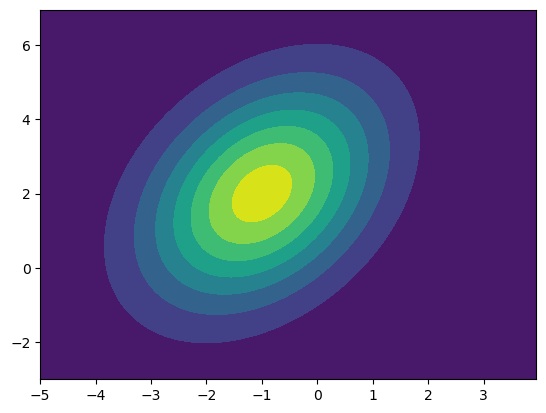

In [86]:
# 3.2
def plot_normal(mean, cov, scale):
    x, y = scale
    pos = np.dstack((x, y))
    rv = multivariate_normal(mean, cov)
    ax2 = plt.figure().add_subplot(111)
    ax2.contourf(x, y, rv.pdf(pos))

plot_normal([-1,2],[[2,1],[1,4]], np.mgrid[-5:4:.05, -3:7:.05])

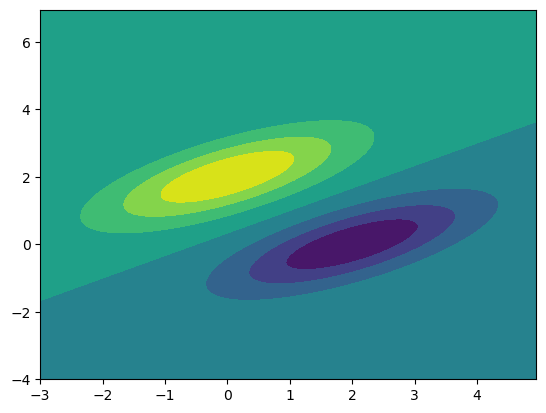

In [78]:
# 3.3
def plot_normal_dif(mean1, mean2, cov1, cov2, scale):
    x, y = scale
    pos = np.dstack((x, y))
    rv1 = multivariate_normal(mean1, cov1)
    rv2 = multivariate_normal(mean2, cov2)
    ax2 = plt.figure().add_subplot(111)
    ax2.contourf(x, y, rv1.pdf(pos) - rv2.pdf(pos))

plot_normal_dif([0,2], [2,0], [[2,1], [1,1]], [[2,1],[1,1]], np.mgrid[-3:5:.05, -4:7:.05])

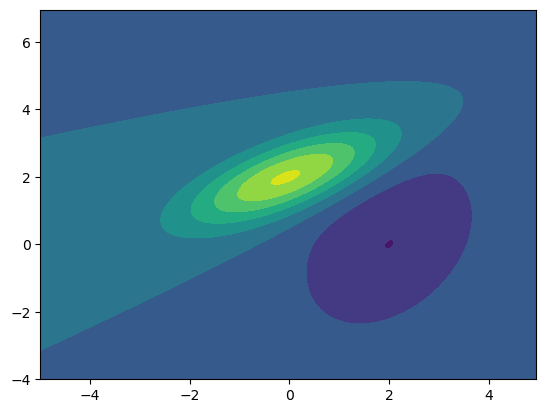

In [85]:
# 3.4

plot_normal_dif([0,2], [2,0], [[2,1], [1,1]], [[2,1],[1,4]], np.mgrid[-5:5:.05, -4:7:.05])

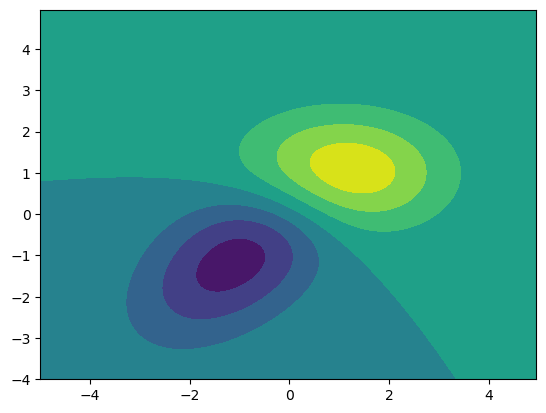

In [84]:
# 3.5

plot_normal_dif([1,1], [-1,-1], [[2,0], [0,1]], [[2,1],[1,2]], np.mgrid[-5:5:.05, -4:5:.05])

In [107]:
# 4.1 Compute mean of sample points.

np.random.seed(306)

mu1, sigma1 = 3, 3
mu2, sigma2 = 4, 2
X1 = np.random.normal(mu1, sigma1, 100)
X2 = np.dot(X1, 0.5) + np.random.normal(mu2, sigma2, 100)

mean = (np.average(X1), np.average(X2))
print(mean)

(3.2527885454529595, 5.187409318687432)


In [197]:
# 4.2 Compute the 2 × 2 covariance matrix of the sample
    
def compute_cov(mu1, mu2, X1, X2):
    cov = 0
    for i in range(100):
        cov += (X1[i] - mu1) * (X2[i] - mu2)
    return cov / len(X1)
      
mu1, mu2 = mean[0], mean[1]
cov_X1_X1 = compute_cov(mu1, mu1, X1, X1)
cov_X2_X2 = compute_cov(mu2, mu2, X2, X2)
cov_X1_X2 = compute_cov(mu1, mu2, X1, X2)

cov_matrix = [[cov_X1_X1, cov_X1_X2],[cov_X1_X2, cov_X2_X2]]
print(cov_matrix)

[[8.703869915403628, 4.514329706946918], [4.514329706946918, 6.4791358210652925]]


In [212]:
# 4.3 Compute eigenvectors and eigenvalues of covariance matrix.

from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(cov_matrix)
eigenvector1 = [eigenvectors[0][0], eigenvectors[1][0]]
eigenvector2 = [eigenvectors[0][1], eigenvectors[1][1]]
print(eigenvalues[0], eigenvector1)
print(eigenvalues[1], eigenvector2)


12.240861227261146 [0.7871631767059206, 0.6167447877673906]
2.9421445092077767 [-0.6167447877673906, 0.7871631767059206]


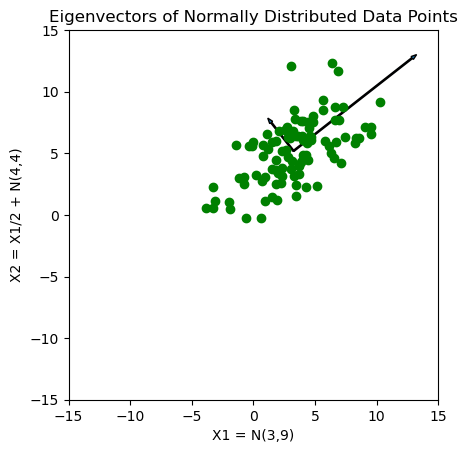

In [216]:
# 4.4 Plot sample points and eigenvectors

plt.arrow(mu1, mu2, eigenvector1[0] * eigenvalues[0], eigenvector1[1] * eigenvalues[0], width = 0.1)
plt.arrow(mu1, mu2, eigenvector2[0] * eigenvalues[1], eigenvector2[1] * eigenvalues[1], width = 0.1)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('X1 = N(3,9)')
plt.ylabel('X2 = X1/2 + N(4,4)')
plt.title('Eigenvectors of Normally Distributed Data Points')

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.plot(X1, X2, 'go')

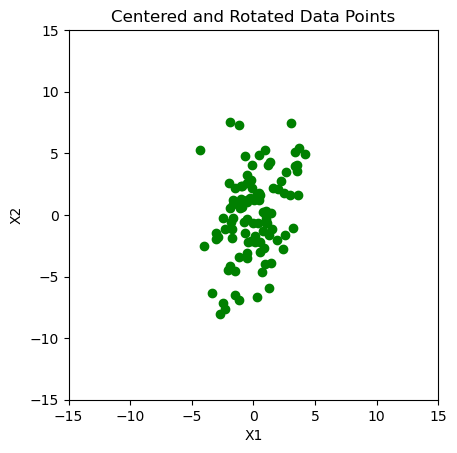

In [217]:
# 4.5 Center and rotate points

U_t = eigenvectors
X1_centered = X1 - mu1
X2_centered = X2 - mu2

X1_rotated = []
X2_rotated = []
for i in range(100):
    new_pt = U_t.dot([X1_centered[i], X2_centered[i]])
    X1_rotated.append(new_pt[0])
    X2_rotated.append(new_pt[1])
    
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Centered and Rotated Data Points')

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.plot(X1_rotated, X2_rotated, 'go')

In [8]:
# Problem 8

import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

if __name__ == "__main__":
    for data_name in ["mnist", "spam"]:
        data = np.load(f"../data/{data_name}-data-hw3.npz")
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4172, 32)
training_labels (4172,)


In [19]:
# Setting fields
mnist_data = np.load(f"../data/mnist-data-hw3.npz")
spam_data = np.load(f"../data/spam-data-hw3.npz")

mnist_test_data = mnist_data["test_data"]
mnist_training_data = mnist_data["training_data"]
mnist_training_labels = mnist_data["training_labels"]
spam_test_data = spam_data["test_data"]
spam_training_data = spam_data["training_data"]
spam_training_labels = spam_data["training_labels"]    

[5 3 5 4 3 6 9 3 7 6]


In [18]:
# 8.1 Fit a Gaussian distribution to pixel values using MLE.

from scipy.cluster.vq import whiten

# Normalize images.
whiten(mnist_test_data)
whiten(mnist_training_data)
whiten(spam_test_data)
whiten(spam_training_data)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.85346117, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.46336529, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.77079969],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [38]:
# MLE

# Compute mean and variance of Gaussian.
   
def gaussian_fit(X, analysis, indices):
    mean = np.average(X)
    if analysis == "LDA":
        pass
    if analysis == "QDA":
        pass
    return multivariate_normal(mean, cov)

def classify_digits(labels):
    zero, one, two, three, four, five, six, seven, eight, nine = [],[],[],[],[],[],[],[],[],[]
    for i in range(len(labels)):
        label = labels[i]
        if label == 0:
            zero.append(i)
        elif label == 1:
            one.append(i)
        elif label == 2:
            two.append(i)
        elif label == 3:
            three.append(i)
        elif label == 4:
            four.append(i)
        elif label == 5:
            five.append(i)
        elif label == 6:
            six.append(i)
        elif label == 7:
            seven.append(i)
        elif label == 8:
            eight.append(i)
        elif label == 9:
            nine.append(i)
    return zero, one, two, three, four, five, six, seven, eight, nine
    

In [39]:
zero, one, two, three, four, five, six, seven, eight, nine = classify_digits(mnist_training_labels)
gaussian_fit(mnist_training_data, "LDA", zero)


[11, 12, 15, 24, 41, 74, 77, 79, 80, 88, 92, 93, 103, 115, 131, 135, 178, 191, 192, 199, 218, 229, 231, 289, 296, 301, 303, 342, 348, 350, 351, 364, 372, 373, 397, 398, 402, 405, 417, 446, 448, 470, 472, 480, 484, 485, 490, 497, 553, 554, 568, 573, 585, 595, 601, 610, 633, 648, 664, 678, 682, 684, 687, 704, 722, 728, 733, 745, 750, 754, 756, 757, 763, 769, 778, 785, 814, 837, 866, 870, 871, 889, 908, 923, 938, 941, 943, 954, 967, 999, 1005, 1007, 1021, 1022, 1025, 1060, 1071, 1076, 1087, 1113, 1119, 1129, 1136, 1143, 1156, 1164, 1193, 1197, 1201, 1204, 1205, 1221, 1225, 1229, 1230, 1249, 1252, 1258, 1270, 1271, 1277, 1286, 1291, 1309, 1335, 1352, 1357, 1360, 1366, 1369, 1390, 1416, 1424, 1426, 1427, 1428, 1430, 1432, 1445, 1452, 1459, 1475, 1484, 1490, 1502, 1503, 1504, 1507, 1543, 1547, 1552, 1564, 1575, 1577, 1590, 1596, 1608, 1609, 1616, 1620, 1621, 1626, 1656, 1660, 1661, 1667, 1668, 1672, 1681, 1684, 1691, 1729, 1732, 1735, 1740, 1741, 1751, 1767, 1785, 1789, 1790, 1791, 1798, 185